# Movie Studio Startup - What movies should we make?

## Business Objective

To provide a detailed analysis on movies that have done well in the recent past and make recommendations to the client, Microsoft Studios, about the kind of movies and markets they should focus on to ensure maximum success and profitability.

Success of a movie can be defined in a myriad ways: awards, critical acclaim, ratings etc. to name a few. To keep things simple here, the analysis will be focused solely on revenue generated by a movie. The initial goal is to gain a foothold in the industry and establish a baseline before experimenting and taking on riskier ventures.

## Datatset

For movie information, we will be using database file from [IMDB](https://www.imdb.com/): im.db. Following image shows the database structure:

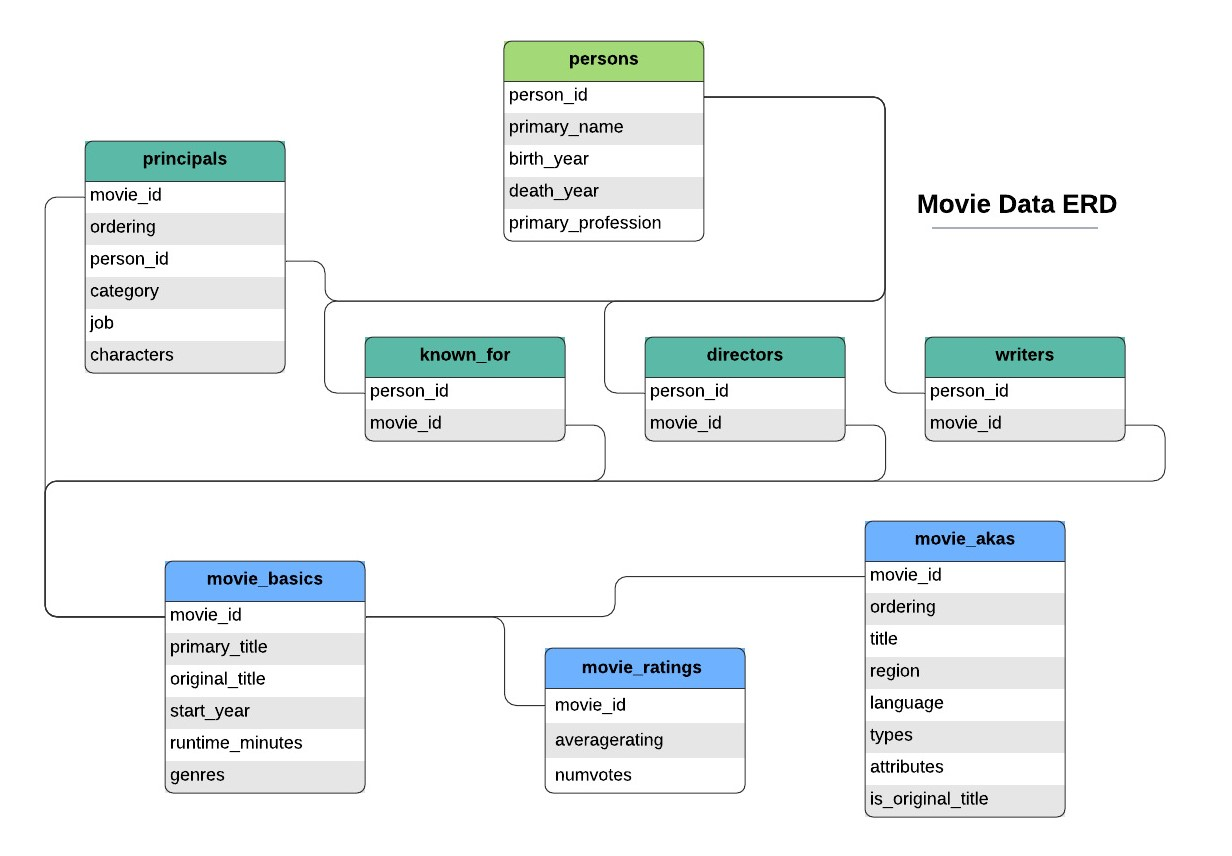

For information about revenue, we will use the **bom.movie_gross.csv** file:

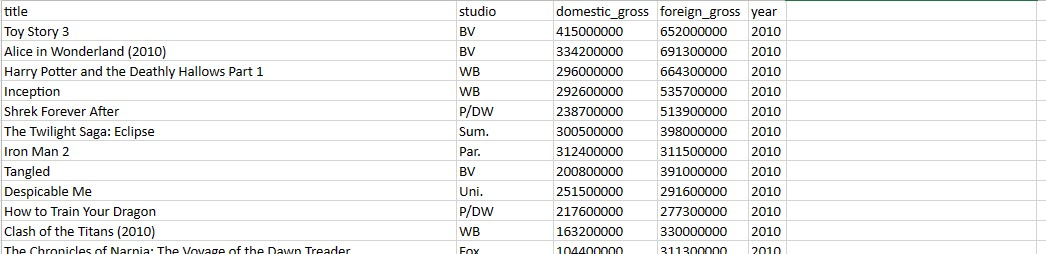

## Importing the data

In [1]:
# import relevant librarires
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

In [2]:
#connecting to the db
conn = sqlite3.connect('im.db')

In [3]:
#getting a list of all the tables
tables = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Briefly looking at each table to see which one might be of use:

In [4]:
pd.read_sql("""SELECT *
                FROM movie_basics""",conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


Like the name suggests, the **movie_basics** lists basic info about each movie like name, release year, genre etc. Also, since the **movie_id** serves as the foreign key in other tables, we will have to join the **movie_basics** table to other tables extract the full information.

In [5]:
pd.read_sql("""SELECT *
               FROM directors""",conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


The **directors** table only lists the the id of the director and the movie which will be useful to plot total revenue by each director.

In [6]:
pd.read_sql("""SELECT *
               FROM known_for""",conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


The **known_for** table could be talking about the actor or actress in each movie.

In [7]:
pd.read_sql("""SELECT *
               FROM movie_akas""",conn)


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


The **movie_akas** table lists information like the language of the movie and the country it was released which could be useful when we try to gather revenue details by region and language. 

In [8]:
pd.read_sql("""SELECT *
               FROM movie_ratings""",conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


The **movie_ratings** table is self-explanatory and provides ratings of each movie.

In [9]:
pd.read_sql("""SELECT *
               FROM persons""",conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


The **persons** provides information about some of people who work behind the scenes.

In [10]:
pd.read_sql("""SELECT *
               FROM principals""",conn)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


The **principals** is an interesting table providing information about the key players in each movie like the actor and the director. We can use this information to see which actor's or director's movie garnered the most revenues, ratings etc.

In [11]:
pd.read_sql("""SELECT *
               FROM writers""",conn)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


The **writers** talks about the writers for each movie

## EDA

Now, that we have an idea of what each table in the db looks like, let's convert them into a DataFrame and explore them for our analysis

Since the **movie_basics** table is the main table, let's start here:

In [12]:
#converting the table into a dataframe
df = pd.read_sql("""SELECT *
                    FROM movie_basics""",conn)
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Total number of movies in the database = 146,144

Let's check the time period of the data

In [13]:
#grouping the dat by year and using count as the aggregate function
year=df.groupby(df['start_year']).count()
year.head()

,movie_id,primary_title,original_title,runtime_minutes,genres
start_year,,,,,
2010,11849,11849,11849,9986,11452
2011,12900,12900,12900,10707,12432
2012,13787,13787,13786,11405,13356
2013,14709,14709,14708,12308,14298
2014,15589,15589,15589,12964,15095


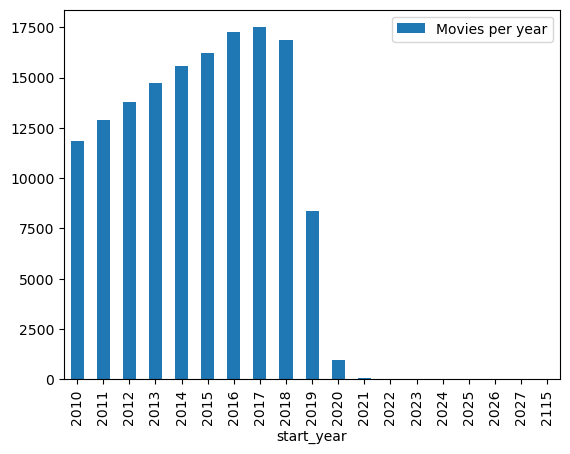

In [14]:
#plotting a histogram to view the distribution of the data
year.plot(kind='bar',y='movie_id',label='Movies per year');

We can see that dataset spans from 2010-2020 with most of the data falling between 2010-2018. We can also see some entries like 2022, 2026 etc. which clearly points to incorrect data. We should remove this from the dataset to potentially skew results.

In [15]:
#removing the erroroneous data
df.drop(df[df['start_year'] >= 2023].index,inplace=True)

#verifying that the the rows have been removed
df['start_year'].value_counts()

2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
2019     8379
2020      937
2021       83
2022       32
Name: start_year, dtype: int64

We can see that the wrong entries have been removed.

Next, let's check for missing data:

In [17]:
df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31728
genres              5405
dtype: int64